# Synthetic data generation from Time-series - Multi-Entity

Time-Series is a type of data that holds a temporal dependency. It can include from categorical to numerical variables, and can be found in a multitude of use-case - from healthcare to financial services.

YData Fabric offers an easy-to-use and familiar interface through the SDK to support Time-Series Synthesis. With the SDK and a few lines of code, users can replicate not only the general statistics of a dataset but also the temporal properties such as seasonality, periods and trends.

[Berka transactions](https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions) is the dataset chosen to demo Fabric Time-Series multi-entity synthesis properties and interface.

## Getting your data from the Data Catalog

In this example we have create a new datasource from Google Cloud Storage and [created a Dataset in Fabric Data Catalog](https://docs.sdk.ydata.ai/latest/get-started/upload_csv/). Copy the required code snippet by clicking in the "Explore in Labs" button that you can find inside of the dataset detail as per the image below.

![Multi entity data synthesis.png](img/multi_entity_explore_lab.png)
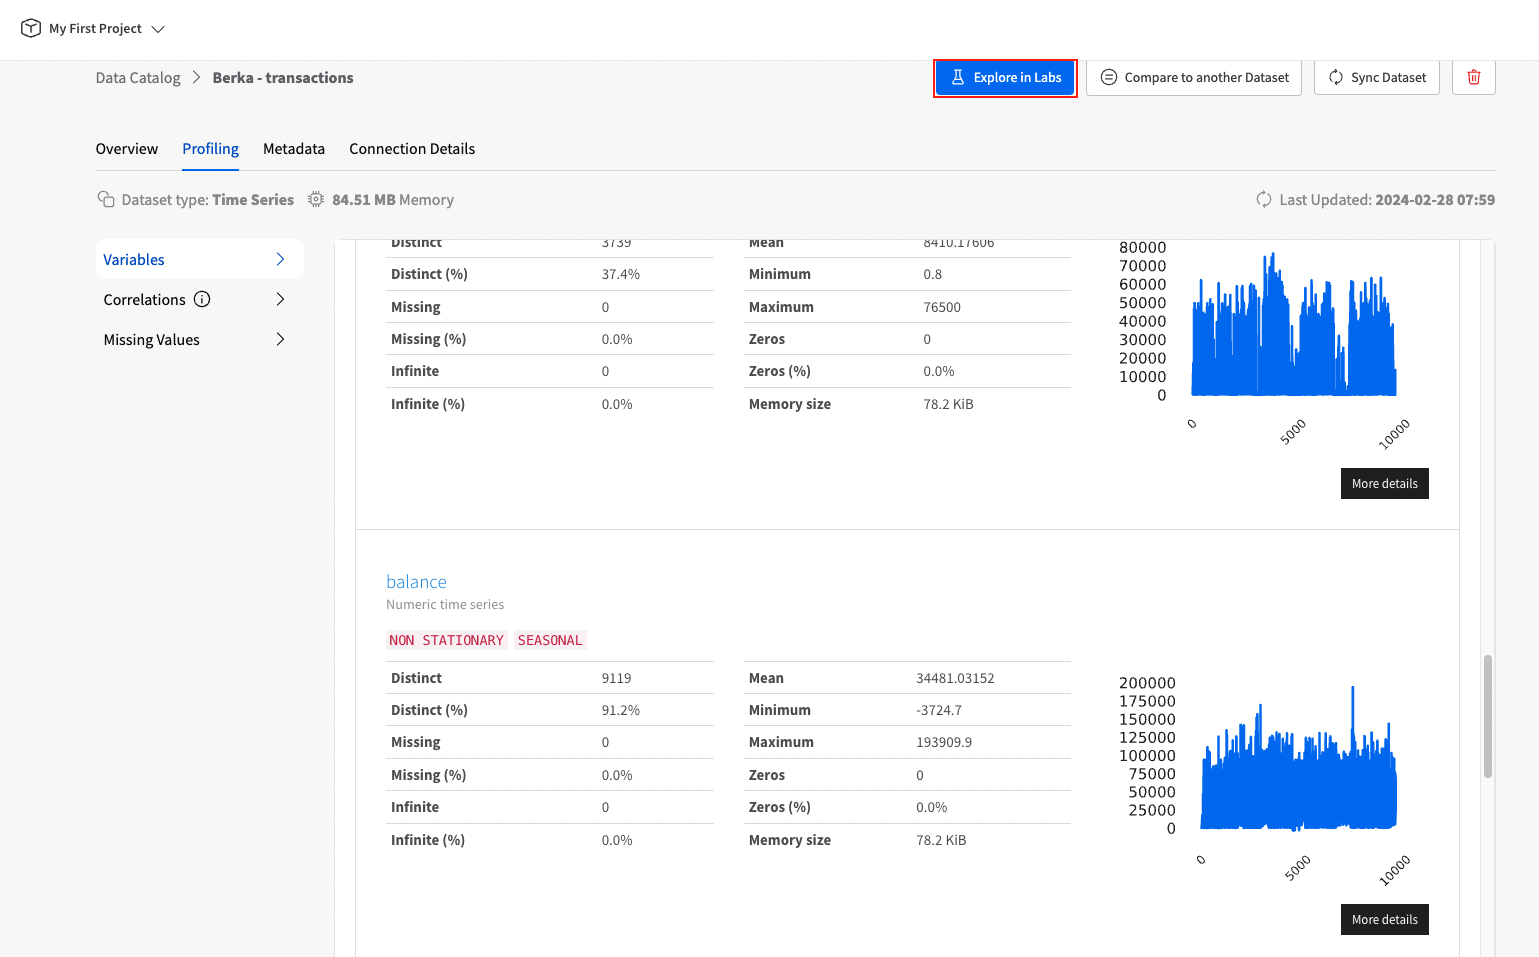

In [1]:
# Importing YData's packages
# Importing YData's packages
from ydata.labs import DataSources
# Reading the Dataset from the DataSource
datasource = DataSources.get(uid='insert-datasource-id', namespace='insert-project-id')
dataset = datasource.dataset

In [2]:
print(dataset)

Dataset 
 
Shape: (1056320, 10)
Schema: 
       Column Variable type
0    trans_id           int
1  account_id           int
2        date           int
3        type        string
4   operation        string
5      amount         float
6     balance         float
7    k_symbol        string
8        bank        string
9     account         float




### Configure the Metadata for synthesis

For the tiem-series synthesis there are two specific attributes to the Metadata that need to be set in order to generate Synthetic Data - *sortbykey*, that can only either be and integer or a date as it is used to understand the temporal order of the data, and *entities* this property is only required when your time-series dataset has time trajectories that refer to more than 1 entity (eg: patients, stores, stations, meters, etc).

In this example, this dataset represents the time evolution of properties like **balances** and **amounts** for different accounts. For that reason we will be setting account as out entity. The column selected as entities can't have any missing values.

In [4]:
from ydata.metadata import Metadata

dataset_attrs = {
    'sortbykey': 'date',
    'entities': 'account_id'
}

metadata = Metadata(dataset, dataset_type='timeseries', dataset_attrs=dataset_attrs)

/home/ydata/.venv/lib/python3.10/site-packages/ydata/metadata/metadata.py:214: UserWarning: Datasets other than Timeseries don't make use of dataset_attrs
  warn("Datasets other than Timeseries don't make use of dataset_attrs")


In [5]:
print(metadata)

Metadata Summary 
 
Dataset type: TIMESERIES
Dataset attributes: 
Number of columns: 10
Number of rows: 1056320
Duplicate rows: 3076
Target column: 

Column detail: 
       Column    Data type Variable type Characteristics
0    trans_id    numerical           int                
1  account_id    numerical           int                
2        date    numerical           int                
3        type  categorical        string                
4   operation  categorical        string                
5      amount    numerical         float                
6     balance    numerical         float                
7    k_symbol  categorical        string                
8        bank  categorical        string                
9     account    numerical         float                

Warnings: 
           Warning                                                                                                                         Columns
0         skewness                              

## Train & Generate synthetic data samples

In [6]:
from ydata.synthesizers import TimeSeriesSynthesizer

synth = TimeSeriesSynthesizer()
synth.fit(dataset, metadata=metadata)

INFO: 2024-02-28 16:11:46,500 [SYNTHESIZER] - Initializing Time Series SYNTHESIZER.
INFO: 2024-02-28 16:11:46,501 [SYNTHESIZER] - Number columns considered for synth: 10
INFO: 2024-02-28 16:12:02,917 [SYNTHESIZER] - Starting the synthetic data modeling process over 11x1 blocks.
INFO: 2024-02-28 16:12:02,918 [SYNTHESIZER] - Generating pipeline for segment (-0.001, 96029.0]
INFO: 2024-02-28 16:12:02,925 [SYNTHESIZER] - Preprocess segment
INFO: 2024-02-28 16:12:02,934 [SYNTHESIZER] - Synthesizer init.
INFO: 2024-02-28 16:12:02,935 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2024-02-28 16:12:54,738 [SYNTHESIZER] - Generating pipeline for segment (96029.0, 192058.0]
INFO: 2024-02-28 16:12:54,745 [SYNTHESIZER] - Preprocess segment
INFO: 2024-02-28 16:12:54,754 [SYNTHESIZER] - Synthesizer init.
INFO: 2024-02-28 16:12:54,754 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2024-02-28 16:13:46,784 [SYNTHESIZER] - Generating pipeline for segme

### Generating synthetic samples

Different from the RegularSynthesizer that generates samples where is row is independent, the same does not happen to time-series data. For that reason the sampling is done based on the number of entities that you want to generate.
This means that the series will have the same trajectory size and within the time period as the original data, but the number of entities generated my vary.
In this case there are

In [ ]:
len(dataset.to_pandas()['account_id'].unique())

In [7]:
synth_sample = synth.sample(n_entities=5)

INFO: 2024-02-28 16:21:59,385 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-28 16:21:59,387 [SYNTHESIZER] - Sample segment (-0.001, 96029.0]
INFO: 2024-02-28 16:22:09,586 [SYNTHESIZER] - Sample segment (96029.0, 192058.0]
INFO: 2024-02-28 16:22:20,587 [SYNTHESIZER] - Sample segment (192058.0, 288087.0]
INFO: 2024-02-28 16:22:31,621 [SYNTHESIZER] - Sample segment (288087.0, 384116.0]
INFO: 2024-02-28 16:22:41,860 [SYNTHESIZER] - Sample segment (384116.0, 480145.0]
INFO: 2024-02-28 16:22:53,383 [SYNTHESIZER] - Sample segment (480145.0, 576174.0]
INFO: 2024-02-28 16:23:05,409 [SYNTHESIZER] - Sample segment (576174.0, 672203.0]
INFO: 2024-02-28 16:23:15,877 [SYNTHESIZER] - Sample segment (672203.0, 768232.0]
INFO: 2024-02-28 16:23:25,716 [SYNTHESIZER] - Sample segment (768232.0, 864261.0]
INFO: 2024-02-28 16:23:37,045 [SYNTHESIZER] - Sample segment (864261.0, 960290.0]
INFO: 2024-02-28 16:23:49,777 [SYNTHESIZER] - Sample segment (960290.0, 1056319.0]


In [8]:
synth_sample.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,171812,0,930101,PRIJEM,VKLAD,1153.0,-375.9,<NA>,<NA>,NaN
1,207264,1,930101,PRIJEM,VKLAD,1234.3,1910.9,<NA>,<NA>,NaN
2,695247,2,930101,PRIJEM,VKLAD,360.8,1709.6,<NA>,<NA>,NaN
3,1117624,3,930101,PRIJEM,VKLAD,1021.5,399.6,<NA>,<NA>,NaN
4,579542,4,930102,PRIJEM,VKLAD,980.5,-494.3,<NA>,<NA>,NaN


## Saving the data

### Writing as a CSV

In [9]:
synth_sample.to_pandas().to_csv('synthetic_sample.csv')
